In [10]:
from config import user, password, host, port, database
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float

In [5]:
# Import Data
port = 5432
engine = create_engine("postgresql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))
conn = engine.connect()
titles_and_salaries = pd.read_sql("SELECT * FROM bonus_view", conn)
titles_and_salaries.head(5)

,title,salary
0,Staff,40000
1,Engineer,53422
2,Engineer,48973
3,Staff,40000
4,Senior Engineer,40000


In [6]:
# Information that will help when binning salary ranges
print(titles_and_salaries.salary.min())
print(titles_and_salaries.salary.max())

40000
129492


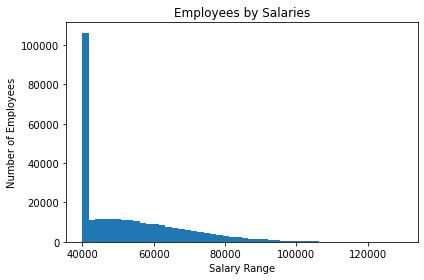

In [46]:
# Basic histogram
plt.hist(titles_and_salaries['salary'], bins=50)
# plt.xticks(tick_locations, binned_salaries.index)
plt.title("Employees by Salaries")
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig(".//employees_by_salaries_histogram.png")
plt.show() 

In [47]:
binned_salaries = titles_and_salaries

bins = [39999, 49999, 59999, 69999, 79999, 89999, 99999, 130000]

group_labels = ["40k to 49k", "50k to 59k", "60k to 69k", "70k to 79k", "80k to 89k", "90k to 99k",
                "100k+"]

binned_salaries["salary_range"] = pd.cut(titles_and_salaries["salary"], bins, labels=group_labels)
binned_salaries = pd.DataFrame(binned_salaries.groupby(["salary_range"]).salary.count())
binned_salaries

,salary
salary_range,
40k to 49k,158465
50k to 59k,57915
60k to 69k,41413
70k to 79k,24814
80k to 89k,11845
90k to 99k,4284
100k+,1288


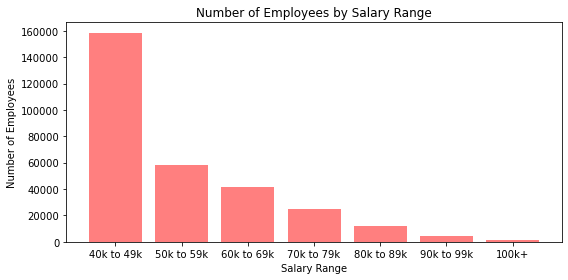

In [48]:
x_axis = np.arange(len(binned_salaries))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis, binned_salaries["salary"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, binned_salaries.index)
plt.title("Number of Employees by Salary Range")
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.savefig(".//employees_by_salaries.png")
plt.show()

In [49]:
title_salaries = titles_and_salaries.groupby(["title"]).mean()
title_salaries

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


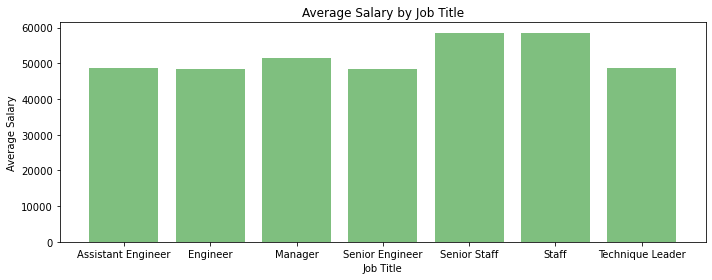

In [50]:
x_axis = np.arange(len(title_salaries))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,4))
plt.bar(x_axis, title_salaries["salary"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, title_salaries.index)
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.savefig(".//salaries_by_title.png")
plt.show()